In [1]:
!pip install riskfolio-lib
!pip install yfinance
!pip install mosek

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 29.6 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
tickers = ['VALE3.SA', "PETR4.SA", "BBAS3.SA"]
tickers.sort()

# Downloading the data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers
assets = data.pct_change().dropna()

Y = assets

# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MSV'  # Semi Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate the portfolio that maximizes the risk adjusted return ratio
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

# Estimate points in the efficient frontier mean - semi standard deviation
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

[*********************100%***********************]  3 of 3 completed


### Plot series

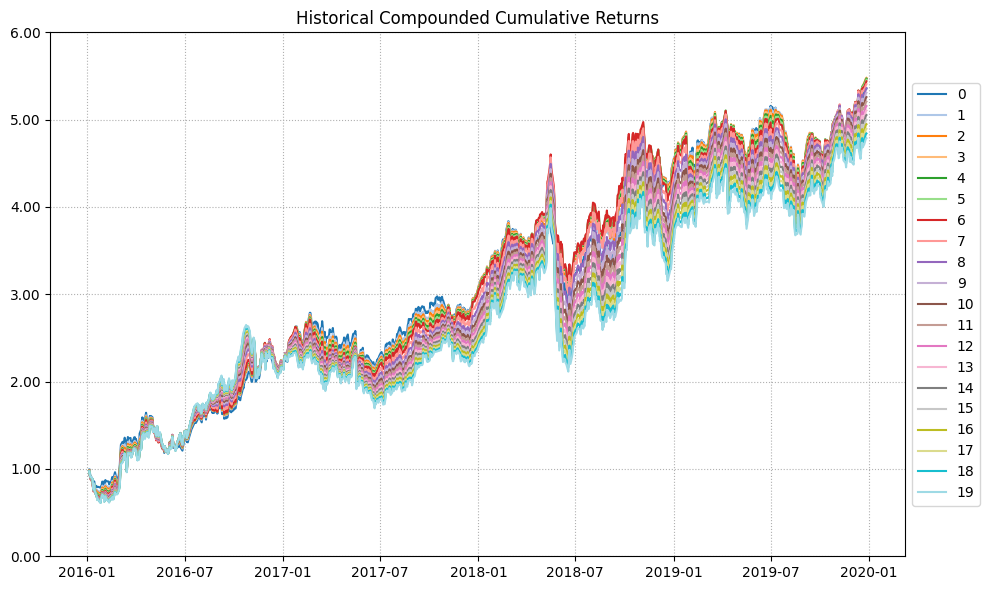

In [7]:
ax = rp.plot_series(returns=Y,
                    w=ws,
                    cmap='tab20',
                    height=6,
                    width=10,
                    ax=None)

### Gráfico de fronteira eficiente a partir de medida de risco especificado pelo usuário

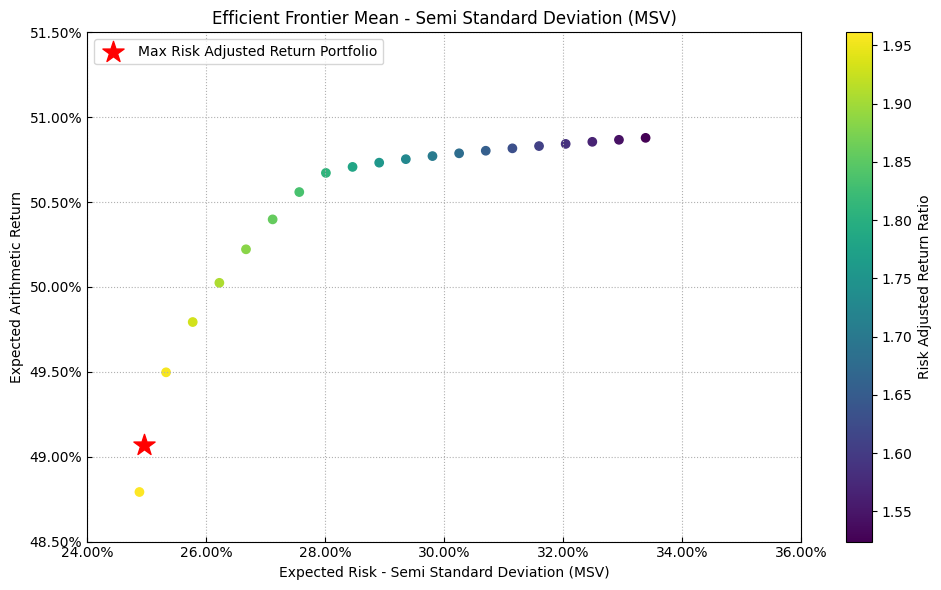

In [8]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=ws,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      cmap='viridis',
                      w=w1,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

### Gráfico de pesos por ativo

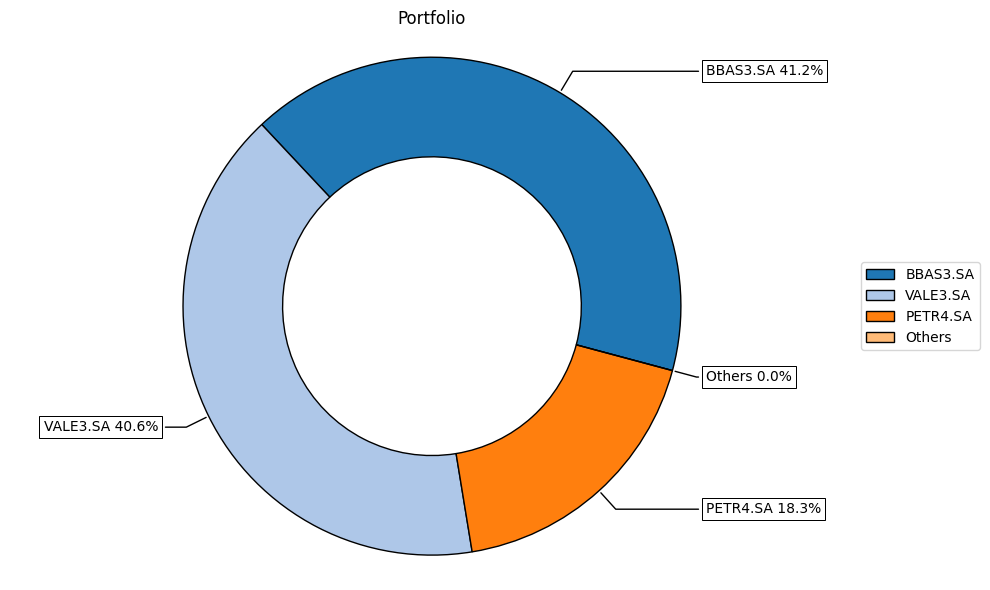

In [9]:
ax = rp.plot_pie(w=w1,
                 title='Portfolio',
                 height=6,
                 width=10,
                 cmap="tab20",
                 ax=None)

### Gráfico de fronteira eficiente

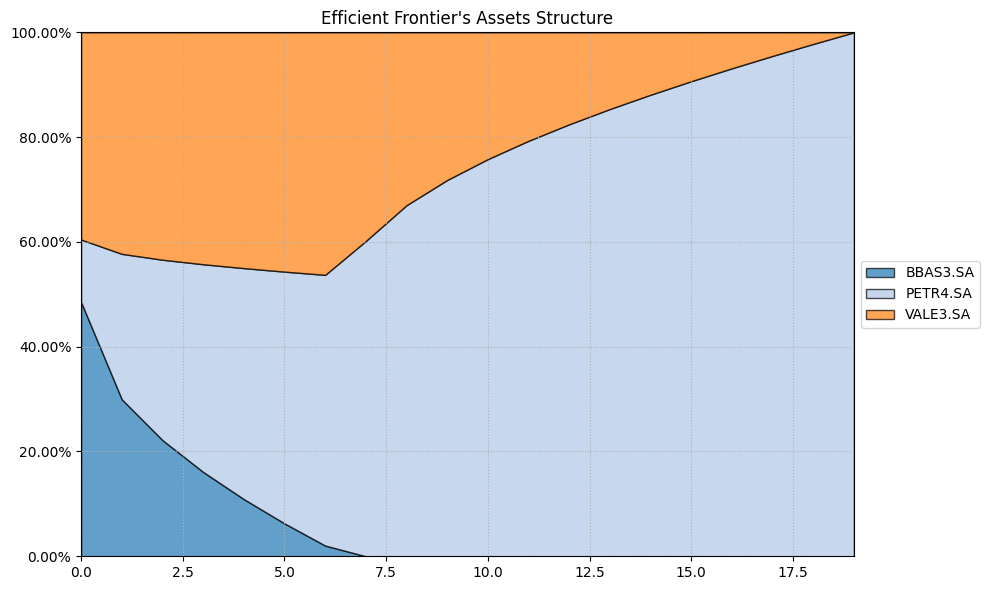

In [11]:
ax = rp.plot_frontier_area(w_frontier=ws,
                           cmap="tab20",
                           height=6,
                           width=10,
                           ax=None)

### Contribuição de risco por ativo

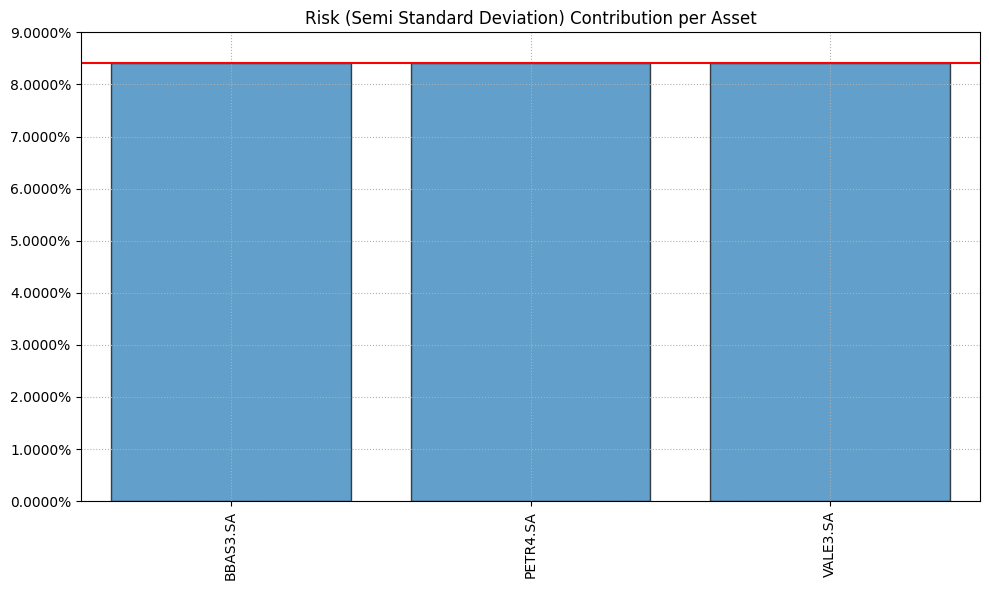

In [12]:
ax = rp.plot_risk_con(w=w2,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)